2602199582 - Fiona Maharani Nugraha

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import random

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
SEED_VALUE=123
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)

In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# Loading Data

In [6]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1599, 12)

# Checking Missing Values and Duplicate Rows

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values

In [9]:
df.duplicated().sum()

240

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Finding the best correlation to decide the Y

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


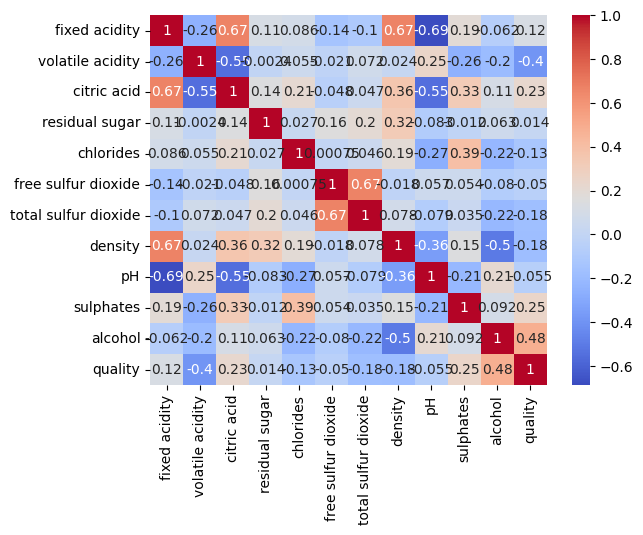

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Splitting Columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


No categorical columns

In [14]:
num_cols = []
cat_cols = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
    elif "int" in str(df[i].dtype) or "float" in str(df[i].dtype):
        num_cols.append(i)

print(num_cols)
print(cat_cols)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
[]


In [15]:
df[num_cols].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Splitting

In [16]:
x,y = df.drop(['quality'],axis=1),df['quality']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 123)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.25,random_state = 123)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(815, 11) (815,)
(272, 11) (272,)
(272, 11) (272,)


# Scaling

In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
num_cols = [col for col in x_train.columns]
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_val[num_cols] = scaler.transform(x_val[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [20]:
print(x_train.shape)

(815, 11)


In [21]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
862,0.236364,0.171429,0.32,0.104895,0.050699,0.071429,0.066421,0.467692,0.393701,0.042945,0.307692
785,0.454545,0.121429,0.41,0.076923,0.078671,0.128571,0.199262,0.615385,0.370079,0.079755,0.169231
501,0.500000,0.185714,0.73,0.374126,0.062937,0.514286,0.254613,0.676923,0.338583,0.294479,0.553846
119,0.190909,0.364286,0.08,0.041958,0.103147,0.285714,0.302583,0.438462,0.472441,0.104294,0.123077
21,0.245455,0.150000,0.31,0.076923,0.076923,0.300000,0.236162,0.615385,0.614173,0.171779,0.200000
...,...,...,...,...,...,...,...,...,...,...,...
1471,0.163636,0.371429,0.08,0.178322,0.050699,0.085714,0.033210,0.241538,0.543307,0.092025,0.646154
1270,0.009091,0.142857,0.01,0.027972,0.017483,0.342857,0.195572,0.049231,0.755906,0.233129,0.861538
1076,0.454545,0.100000,0.56,0.055944,0.061189,0.014286,0.003690,0.395385,0.322835,0.220859,0.461538
853,0.400000,0.128571,0.39,0.020979,0.073427,0.557143,0.177122,0.486154,0.574803,0.220859,0.384615


# Create Tensor Dataset

In [22]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32).shuffle(10)
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32).shuffle(10)
val_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val)).batch(32).shuffle(10)

In [23]:
train_ds

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 11), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# Create Model

## Sequential API

In [24]:
from tensorflow.keras.layers import Input
from tensorflow.keras import layers
from tensorflow import keras

In [25]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1)
])

In [26]:
model.predict(val_ds)

9/9 [==============================] - 0s 4ms/step


array([[0.0401132 ],
       [0.01975346],
       [0.03848559],
       [0.02968479],
       [0.01440082],
       [0.01633105],
       [0.02799669],
       [0.02629998],
       [0.02389245],
       [0.04554209],
       [0.03782771],
       [0.02860402],
       [0.03329593],
       [0.02646884],
       [0.02940411],
       [0.02184283],
       [0.01730605],
       [0.02527888],
       [0.02274621],
       [0.02701845],
       [0.03347524],
       [0.02179208],
       [0.01254775],
       [0.03946598],
       [0.02627145],
       [0.02865714],
       [0.03620978],
       [0.02650375],
       [0.01351569],
       [0.04758964],
       [0.01659732],
       [0.02698589],
       [0.03959099],
       [0.04447204],
       [0.03833093],
       [0.03740444],
       [0.02612039],
       [0.02284978],
       [0.01942589],
       [0.03153048],
       [0.02541908],
       [0.01285437],
       [0.03059403],
       [0.0279308 ],
       [0.03030656],
       [0.02513998],
       [0.02534628],
       [0.035

In [27]:
x = tf.constant([[i for i in range(0,11)]])

In [28]:
x

<tf.Tensor: shape=(1, 11), dtype=int32, numpy=array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]], dtype=int32)>

# Functional API

In [29]:
inputs = tf.keras.Input(shape=(11,))
dense1 = Dense(64, activation="relu")(inputs)
dense2 = Dense(32,activation=tf.keras.layers.LeakyReLU(alpha=0.2))(dense1)
cat_layer = tf.keras.layers.Concatenate(axis=1)([dense1,dense2])
out = Dense(1,activation='sigmoid')(cat_layer)

model = Model(inputs=inputs, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 64)                   768       ['input_1[0][0]']             
                                                                                                  
 dense_5 (Dense)             (None, 32)                   2080      ['dense_4[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 96)                   0         ['dense_4[0][0]',             
                                                                     'dense_5[0][0]']         

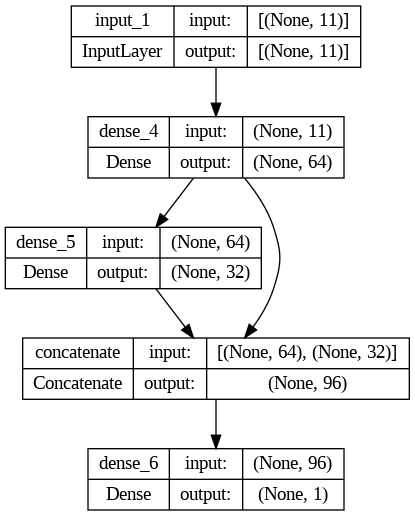

In [30]:
plot_model(model,show_shapes=True)

# Train Model

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='mean_absolute_error',
              metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanSquaredError()])


In [48]:
history = model.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    batch_size=256,
    epochs=150,
)

Epoch 1/150
4/4 [==============================] - 1s 98ms/step - loss: 0.9154 - mean_absolute_error: 0.9154 - mean_squared_error: 1.3738 - val_loss: 0.9507 - val_mean_absolute_error: 0.9507 - val_mean_squared_error: 1.2414
Epoch 2/150
4/4 [==============================] - 0s 37ms/step - loss: 0.7665 - mean_absolute_error: 0.7665 - mean_squared_error: 0.8312 - val_loss: 0.7343 - val_mean_absolute_error: 0.7343 - val_mean_squared_error: 0.8141
Epoch 3/150
4/4 [==============================] - 0s 38ms/step - loss: 0.6189 - mean_absolute_error: 0.6189 - mean_squared_error: 0.5866 - val_loss: 0.5693 - val_mean_absolute_error: 0.5693 - val_mean_squared_error: 0.5500
Epoch 4/150
4/4 [==============================] - 0s 38ms/step - loss: 0.5570 - mean_absolute_error: 0.5570 - mean_squared_error: 0.4998 - val_loss: 0.5070 - val_mean_absolute_error: 0.5070 - val_mean_squared_error: 0.4690
Epoch 5/150
4/4 [==============================] - 0s 35ms/step - loss: 0.4825 - mean_absolute_error: 0.

In [49]:
history.history

{'loss': [0.9154102802276611,
  0.766471266746521,
  0.6188547611236572,
  0.5569751858711243,
  0.48249179124832153,
  0.44613200426101685,
  0.44044730067253113,
  0.4317733645439148,
  0.43792814016342163,
  0.42615771293640137,
  0.44005441665649414,
  0.43592554330825806,
  0.42861753702163696,
  0.42227211594581604,
  0.43079835176467896,
  0.42087700963020325,
  0.42423155903816223,
  0.41458186507225037,
  0.4263682961463928,
  0.41882210969924927,
  0.41972440481185913,
  0.42027798295021057,
  0.4105014503002167,
  0.40827879309654236,
  0.42342105507850647,
  0.42490971088409424,
  0.4165218770503998,
  0.4215671718120575,
  0.4169086813926697,
  0.42054498195648193,
  0.41308799386024475,
  0.4052988290786743,
  0.41041356325149536,
  0.40534645318984985,
  0.40645548701286316,
  0.4104043245315552,
  0.40617483854293823,
  0.4071255028247833,
  0.40108343958854675,
  0.4091334939002991,
  0.40611934661865234,
  0.4038624167442322,
  0.39807844161987305,
  0.401524573564529

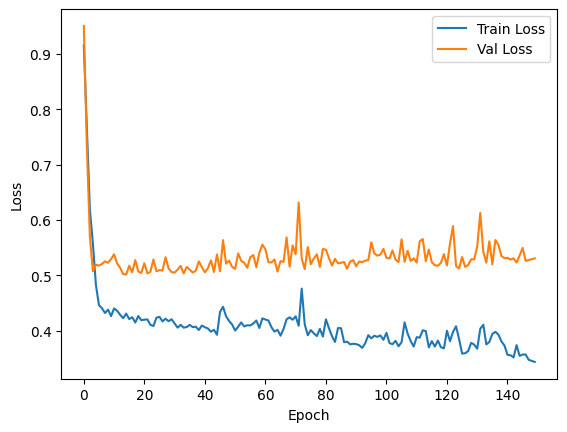

In [50]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Both the training loss and validation loss appear to be decreasing over the course of training. This suggests that the model is learning from the data and improving its performance.

Train loss is consistently higher than validation loss, indicating that data training model is likely overfitted.  If the training loss continues to decrease while the validation loss starts to increase, it would be a strong suggest that the model is overfitted.


In [51]:
model.save('functional_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
x = tf.keras.models.load_model('functional_model.h5')
x.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               6144      
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 1)                 513       
                                                                 
Total params: 531969 (2.03 MB)
Trainable params: 531969 (2.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.save_weights('function_weights')

In [54]:
model.load_weights('function_weights')

In [55]:
model.weights

[<tf.Variable 'dense_7/kernel:0' shape=(11, 512) dtype=float32, numpy=
 array([[ 0.05512187, -0.00979601,  0.00024745, ..., -0.08245967,
          0.07569339,  0.0389408 ],
        [-0.05684159, -0.00315807, -0.02238218, ..., -0.05431101,
         -0.11115893, -0.05855285],
        [-0.04170799,  0.02693286,  0.03700975, ...,  0.00894029,
          0.08564056,  0.05971503],
        ...,
        [ 0.0202721 , -0.08724073,  0.07772518, ..., -0.01756189,
         -0.00562018, -0.11711854],
        [-0.08178206,  0.07043881,  0.02450479, ...,  0.04269102,
         -0.06380844, -0.04524164],
        [ 0.08824237,  0.00572576, -0.07043435, ..., -0.01978127,
         -0.07585432, -0.00442683]], dtype=float32)>,
 <tf.Variable 'dense_7/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 3.14916596e-02,  1.70498546e-02,  0.00000000e+00, -1.31823914e-03,
         9.26913694e-03, -3.65336915e-03,  2.00971253e-02,  1.75038017e-02,
         4.87448042e-03, -1.90184023e-02,  3.32896039e-02,  1.865650

# Evaluate Model

In [56]:
model.evaluate(test_ds)

9/9 [==============================] - 1s 6ms/step - loss: 0.4690 - mean_absolute_error: 0.4674 - mean_squared_error: 0.3834


[0.46904173493385315, 0.4673837125301361, 0.3833606541156769]

#Callback Function - Early Stopping
Callback function is calling back a code or a function everytime a user/computer do a certain thing.

In [57]:
from tensorflow.keras import callbacks


In [64]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=30,
    restore_best_weights=True,
)

In [65]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mae')

In [66]:
history = model.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    batch_size=256,
    epochs=150,
    callbacks=[early_stopping],
    verbose=0,
)

In [67]:
history.history

{'loss': [5.320788383483887,
  3.5286295413970947,
  1.3573384284973145,
  1.0838595628738403,
  1.1876943111419678,
  0.8487878441810608,
  0.908128023147583,
  0.7768108248710632,
  0.7394140958786011,
  0.7599781155586243,
  0.6739296913146973,
  0.6680318117141724,
  0.6694948077201843,
  0.6344995498657227,
  0.6318303942680359,
  0.6231371760368347,
  0.6135594248771667,
  0.6160934567451477,
  0.6112648248672485,
  0.6063664555549622,
  0.5986863374710083,
  0.5857064127922058,
  0.5852704048156738,
  0.6047228574752808,
  0.577528178691864,
  0.570456326007843,
  0.5609126687049866,
  0.5588003396987915,
  0.5613364577293396,
  0.551193356513977,
  0.5480908751487732,
  0.5429444313049316,
  0.556534469127655,
  0.5376656651496887,
  0.5317814350128174,
  0.5353373885154724,
  0.5254212617874146,
  0.520779013633728,
  0.5161564350128174,
  0.5134644508361816,
  0.5127056241035461,
  0.5094822645187378,
  0.5042258501052856,
  0.5002887845039368,
  0.49905499815940857,
  0.5007

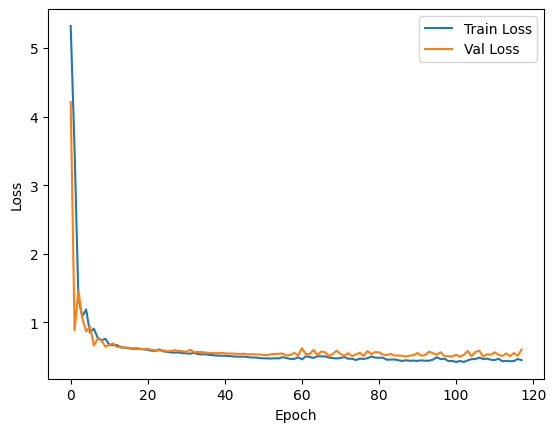

In [68]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

The gap between the curves appears to be increasing as training progresses, which suggests the model is generalizing well.

Model is likely not overfitting after implemented callback function, the model is performed well.